# Ocorrencias_Aeronauticas_Aviacao_Civil_Brasileira - Teste Tecnico Cientista de Dados - A3Data
por: Hérikles Cordeiro - heriklesvinicyus@hotmail.com

## 1. Apresentação do Desafio

Este notebook tem como fim ser avaliação do teste técnico para a vaga de Cientista de Dados da A3Data base dados "Ocorrências Aeronáuticas na Aviação Civil Brasileira" dos dados abertos do governo ([link](https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira))

Segundo a fonte do próprio repositóio essa base de dados descreve, as ocorrências aeronáuticas são gerenciadas pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Está presente na base as ocorrências aeronáuticas notificadas do ano de 2010 a 2020. Ainda segundo o Portal Brasileiro de Dados Abertos, "*Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG)*". 

Dado o que foi apresentado acima,o objetivo desse trabalho e realizar uma análise exploratória com foco nas ocorrências com fatalidades, levantamento de Hipóteses/insight e , por fim, responder às perguntas levantadas no texto. Com o objetivo de identificar quais características estão relacionadas a esse evento.


## 2. Metodologia do Processo Utilizado

Esse teste foi encarado como se o presente participante já estivesse integrado a equipe da A3Data e essa base de dados fosse apresentada por um novo cliente. Esta seria o equivalente a primeira entrega para o cliente.

Posto esta condição, inicialmente foi realizado um processo de investigação nos conjuntos de dados indicados nos testes, o intuito foi entender os dados disponíveis e definir um escopo inicial. Toda atividade feita nesse sentido foi descrita em outro documento Analise_e_limpeza_dados.ipynb, optou se por essa metodologia para deixar esse presente documento apenas as análises de dados e storytelling direcionados para um possível cliente leigo. O outro documento é direcionado para discussões dentro da equipe de Dados.

Base de dados exportadas a partir dos resultados obtidos no notebook Analise_e_limpeza_dados.ipynb e são com as seguintes Variáveis:

OCORRÊNCIA:
* codigo_ocorrencia = Representará todos os id's;
* ocorrencia_classificacao;
* ocorrencia_uf;
* ocorrencia_dia = será tranformado em 'ocorrencia_mes' e 'ocorrencia_ano';
* ocorrencia_hora = será tranformado em horas completas;
* total_aeronaves_envolvidas;

OCORRÊNCIA_TIPO
* codigo_ocorrencia1 = será covertida para 'codigo_ocorrencia';
* ocorrencia_tipo;

AERONAVE
* codigo_ocorrencia2 = será covertida para 'codigo_ocorrencia';
* aeronave_registro_segmento;
* aeronave_tipo_veiculo;
* aeronave_fabricante;
* aeronave_modelo;
* aeronave_motor_tipo;
* aeronave_motor_quantidade;
* aeronave_assentos;
* aeronave_ano_fabricacao;
* aeronave_nivel_dano;
* aeronave_fase_operacao;
* aeronave_fatalidades_total;

FATOR_CONTRIBUINTE
* codigo_ocorrencia3 = será covertida para 'codigo_ocorrencia';
* fator_area;

I) A redução de dimensão das base de dados dão a possibilidade de apresentar um resultado satisfatório, dadas as condições propostas no teste.
II) O pré-processamento são descrito no outro notebook, já Citado.



### 2.1 Definição dos algorítmos usados para entender a base de dados
Como descrito anteriormente, o objetivo final desse documento foi definido como encontrar possíveis relações entre as variáveis acima citadas e ocorrências com fatalidades. Para atingir essa meta, foram escolhidas duas técnicas de Aprendizado de Máquina com a capacidade de descrever as relações presentes na base de dados. As Técnicas são Regressão Logística e Árvores de Decisão, ambas as técnicas têm como características uma alta aplicabilidade.

Devido a Regressão Logística, em sua essência, ser uma técnica estatística projetada para trabalhar com classificação binaria a variavel 'aeronave_fatalidades_total'(escolhida como valor alvo), logo, para y=1 o 'aeronave_fatalidades_total' tem que ter valor maior que 0, caso contrário, y=0.



## 3. Hipóteses

1. Aeronaves mais antigas tem um maior número de acidentes com fatalidade?
1. Ocorrências com fatalidade têm predominância no período noturno?
1. Quais meses tem maior número de ocorrência?
1. Quais meses tem maior número de ocorrência com fatalidade?
1. Algum modelo está mais associado a ocorrência com fatalidade?
1. Algum Fabricante está mais associado a ocorrência com fatalidade?
1. O maior número de ocorrência com fatalidade está entre quais tipos aeronaves?
1. É possível apontar que a maioria das ocorrências com fatalidade está relacionado a fatores humanos?
1. Qual o resultado apresentado pelos algoritmos de ML?

Outras questões podem ser levantadas durante o decorrer do experimento.

## 4. Análise Exploratória

Essa seção pretende mostrar as características das bases de dados através de tabelas e gráficos. Ao final desta seção o arcabouço para responder perguntas da seção 3 deve está posto.


### 4.1 Bibliotecas e Carregamento de Dados

#### Importação de bibliotecas

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### Carregar dados

In [2]:
db_ocorrencia = pd.read_csv('base_dados/trabalhada_ocorrencia_2010_2020.csv')
db_ocorrencia_tipo = pd.read_csv('base_dados/trabalhada_ocorrencia_tipo_2010_2020.csv')
db_aeronave = pd.read_csv('base_dados/trabalhada_aeronave_tipo_2010_2020.csv')
db_fator_contribuinte = pd.read_csv('base_dados/trabalhada_fator_contribuinte_2010_2020.csv')

#### Tabela com valores das variaveis

##### Categoricas

In [3]:
temp = db_ocorrencia["ocorrencia_classificacao"].value_counts()
print('ocorrencia_classificacao')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_ocorrencia.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_ocorrencia["ocorrencia_uf"].value_counts()
print('ocorrencia_uf')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_ocorrencia.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_ocorrencia["ocorrencia_mes"].value_counts()
print('ocorrencia_mes')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_ocorrencia.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_ocorrencia["ocorrencia_ano"].value_counts()
print('ocorrencia_ano')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_ocorrencia.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

ocorrencia_classificacao


,quant,porc
INCIDENTE,3171,55.13%
ACIDENTE,1844,32.06%
INCIDENTE GRAVE,737,12.81%


ocorrencia_uf


,quant,porc
SP,1373,23.87%
MG,529,9.2%
RJ,516,8.97%
PR,485,8.43%
RS,352,6.12%
GO,309,5.37%
MT,292,5.08%
PA,287,4.99%
AM,233,4.05%
BA,213,3.7%


ocorrencia_mes


,quant,porc
1,532,9.25%
3,518,9.01%
9,503,8.74%
4,496,8.62%
2,492,8.55%
7,483,8.4%
12,481,8.36%
10,471,8.19%
5,467,8.12%
8,456,7.93%


ocorrencia_ano


,quant,porc
2013,654,11.37%
2012,647,11.25%
2011,576,10.01%
2014,567,9.86%
2010,552,9.6%
2020,510,8.87%
2019,496,8.62%
2015,471,8.19%
2018,444,7.72%
2017,432,7.51%


In [4]:
print('OCORRENCIA_tipo')
temp = db_ocorrencia_tipo["ocorrencia_tipo"].value_counts()
print('ocorrencia_tipo')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_ocorrencia_tipo.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

OCORRENCIA_tipo
ocorrencia_tipo


,quant,porc
FALHA DO MOTOR EM VOO,723,12.29%
ESTOURO DE PNEU,614,10.44%
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,612,10.4%
PERDA DE CONTROLE NO SOLO,459,7.8%
PERDA DE CONTROLE EM VOO,363,6.17%
...,...,...
PERDA DE CONDIÇÕES DE SUSTENTAÇÃO EM ROTA,1,0.02%
EXPLOSÃO,1,0.02%
IMC NÃO INTENCIONAL,1,0.02%
RELACIONADO COM SECURITY,1,0.02%


In [5]:
print('Aeronave')

temp = db_aeronave["aeronave_registro_segmento"].value_counts()
print('aeronave_registro_segmento')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_tipo_veiculo"].value_counts()
print('aeronave_tipo_veiculo')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_fabricante"].value_counts()
print('aeronave_fabricante')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_modelo"].value_counts()
print('aeronave_modelo')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_motor_tipo"].value_counts()
print('aeronave_motor_tipo')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_motor_quantidade"].value_counts()
print('aeronave_motor_quantidade')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_ano_fabricacao"].value_counts()
print('aeronave_ano_fabricacao')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_nivel_dano"].value_counts()
print('aeronave_nivel_dano')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_fase_operacao"].value_counts()
print('aeronave_fase_operacao')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))


Aeronave
aeronave_registro_segmento


,quant,porc
PARTICULAR,1777,30.53%
REGULAR,1176,20.2%
INSTRUÇÃO,819,14.07%
TÁXI AÉREO,770,13.23%
EXPERIMENTAL,460,7.9%
AGRÍCOLA,345,5.93%
ADMINISTRAÇÃO DIRETA,193,3.32%
ESPECIALIZADA,122,2.1%
***,89,1.53%
MÚLTIPLA,32,0.55%


aeronave_tipo_veiculo


,quant,porc
AVIÃO,4683,80.45%
HELICÓPTERO,654,11.24%
ULTRALEVE,333,5.72%
***,110,1.89%
PLANADOR,19,0.33%
ANFÍBIO,13,0.22%
TRIKE,5,0.09%
DIRIGÍVEL,2,0.03%
HIDROAVIÃO,1,0.02%
BALÃO,1,0.02%


aeronave_fabricante


,quant,porc
CESSNA AIRCRAFT,903,15.51%
NEIVA INDUSTRIA AERONAUTICA,650,11.17%
EMBRAER,649,11.15%
PIPER AIRCRAFT,412,7.08%
***,321,5.51%
...,...,...
EDUARDO F. H. GONTIJO,1,0.02%
PAULO R. M. MAIA,1,0.02%
IVAN CESAR ROSSONI,1,0.02%
PAULO CESAR CASTRO MOURA,1,0.02%


aeronave_modelo


,quant,porc
ATR-72-212A,189,3.25%
AB-115,178,3.06%
ERJ 190-200 IGW,161,2.77%
EMB-810D,158,2.71%
152,132,2.27%
...,...,...
G FLY,1,0.02%
ASTRA SPX,1,0.02%
A300-B4-203,1,0.02%
P206A,1,0.02%


aeronave_motor_tipo


,quant,porc
PISTÃO,3248,55.8%
JATO,1124,19.31%
TURBOÉLICE,718,12.33%
TURBOEIXO,544,9.35%
***,168,2.89%
SEM TRAÇÃO,19,0.33%


aeronave_motor_quantidade


,quant,porc
MONOMOTOR,2959,50.83%
BIMOTOR,2584,44.39%
SEM TRAÇÃO,131,2.25%
TRIMOTOR,75,1.29%
***,65,1.12%
QUADRIMOTOR,7,0.12%


aeronave_ano_fabricacao


,quant,porc
0.0,267,4.59%
2008.0,248,4.26%
2010.0,242,4.16%
2009.0,238,4.09%
2011.0,221,3.8%
...,...,...
1956.0,1,0.02%
1942.0,1,0.02%
1940.0,1,0.02%
9999.0,1,0.02%


aeronave_nivel_dano


,quant,porc
NENHUM,2054,35.29%
LEVE,1715,29.46%
SUBSTANCIAL,1649,28.33%
DESTRUÍDA,350,6.01%
***,53,0.91%


aeronave_fase_operacao


,quant,porc
POUSO,982,16.87%
DECOLAGEM,953,16.37%
CRUZEIRO,865,14.86%
CORRIDA APÓS POUSO,615,10.57%
TÁXI,443,7.61%
SUBIDA,382,6.56%
APROXIMAÇÃO FINAL,302,5.19%
MANOBRA,235,4.04%
DESCIDA,167,2.87%
ESPECIALIZADA,161,2.77%


In [6]:
print('FATOR_CONTRIBUINTE')
temp = db_fator_contribuinte["fator_area"].value_counts()
print('fator_area')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_fator_contribuinte.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

FATOR_CONTRIBUINTE
fator_area


,quant,porc
FATOR OPERACIONAL,2720,65.37%
FATOR HUMANO,1325,31.84%
OUTRO,62,1.49%
***,28,0.67%
FATOR MATERIAL,26,0.62%


##### Numéricos

In [7]:
pd.DataFrame([ db_ocorrencia['total_aeronaves_envolvidas'],db_aeronave['aeronave_assentos'],db_aeronave['aeronave_fatalidades_total']]).T.describe()

,total_aeronaves_envolvidas,aeronave_assentos,aeronave_fatalidades_total
count,5752.000000,5670.000000,5821.00000
mean,1.011996,28.424868,0.15049
std,0.113566,55.406857,0.68290
min,1.000000,0.000000,0.00000
25%,1.000000,2.000000,0.00000
50%,1.000000,6.000000,0.00000
75%,1.000000,11.000000,0.00000
max,3.000000,384.000000,16.00000


#### Número de Ocorrencias 

Número total de ocorrências registrada: 5752, porém exeistem Ocorrências envolvendo mais de uma Aeronave
onde:
 INCIDENTE          3171
ACIDENTE           1844
INCIDENTE GRAVE     737
Name: ocorrencia_classificacao, dtype: int64 




<AxesSubplot:ylabel='ocorrencia_classificacao'>

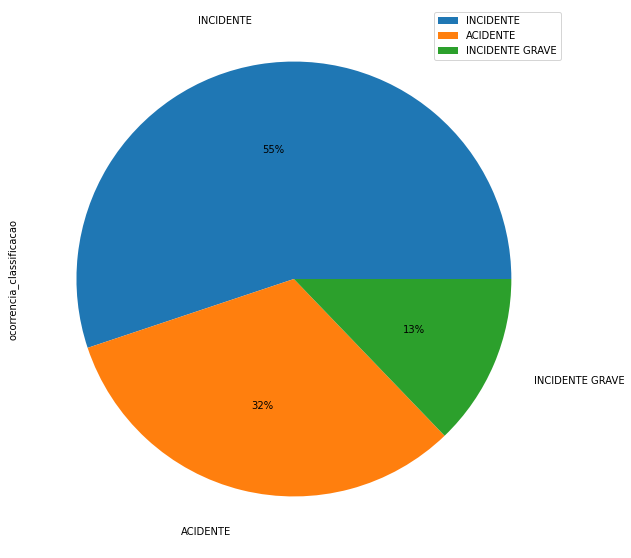

In [8]:
print(f'Número total de ocorrências registrada: {db_ocorrencia.shape[0]}, porém exeistem Ocorrências envolvendo mais de uma Aeronave')
print("onde:\n",db_ocorrencia['ocorrencia_classificacao'].value_counts(),'\n\n')
pd.DataFrame(db_ocorrencia['ocorrencia_classificacao'].value_counts()).plot.pie(y='ocorrencia_classificacao', figsize=(10,10),autopct='%1.0f%%', labeldistance=1.2)

#### Numero de Fatalidades 

5314
numero de vítimas da fatalidade: 876


,tipo,quant
0,Quant_Ocorencia_fatalidade,438
1,Quant_Ocorencia_sem_fatalidade,5314


<AxesSubplot:title={'center':'Quantidade de Ocorrencias com fatalidade'}, ylabel='tipo'>

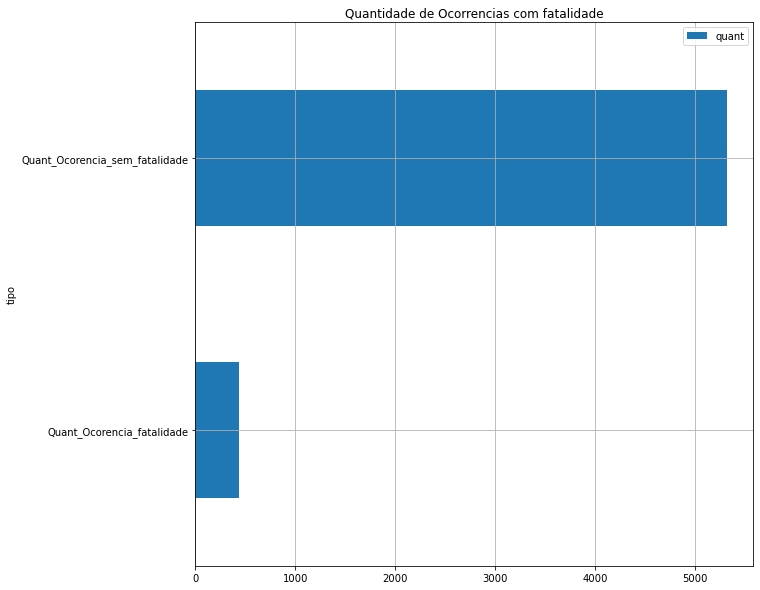

In [9]:
aux_db_aeronave = db_aeronave[db_aeronave['aeronave_fatalidades_total']>0]
aux_db_aeronave.drop_duplicates('codigo_ocorrencia')
print(db_ocorrencia.shape[0]-aux_db_aeronave.shape[0])
print('numero de vítimas da fatalidade:',db_aeronave['aeronave_fatalidades_total'].sum())
d = [['Quant_Ocorencia_fatalidade', int(aux_db_aeronave.shape[0])], ['Quant_Ocorencia_sem_fatalidade' , int(db_ocorrencia.shape[0])-int(aux_db_aeronave.shape[0])]]
display(pd.DataFrame(d, columns=['tipo', 'quant']))
pd.DataFrame(d, columns=['tipo', 'quant']).plot.barh(ylabel='quant', x='tipo', title='Quantidade de Ocorrencias com fatalidade', figsize=(10,10), grid=True,)

In [10]:
temp = db_ocorrencia["ocorrencia_ano"].value_counts()
print('ocorrencia_ano')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_ocorrencia.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

temp = db_aeronave["aeronave_tipo_veiculo"].value_counts()
print('aeronave_tipo_veiculo')
display(pd.DataFrame({'quant': list(temp), 'porc':[str(round((x*100)/db_aeronave.shape[0],2))+'%' for x in list(temp)]}, index=temp.index))

ocorrencia_ano


,quant,porc
2013,654,11.37%
2012,647,11.25%
2011,576,10.01%
2014,567,9.86%
2010,552,9.6%
2020,510,8.87%
2019,496,8.62%
2015,471,8.19%
2018,444,7.72%
2017,432,7.51%


aeronave_tipo_veiculo


,quant,porc
AVIÃO,4683,80.45%
HELICÓPTERO,654,11.24%
ULTRALEVE,333,5.72%
***,110,1.89%
PLANADOR,19,0.33%
ANFÍBIO,13,0.22%
TRIKE,5,0.09%
DIRIGÍVEL,2,0.03%
HIDROAVIÃO,1,0.02%
BALÃO,1,0.02%


In [11]:
aux_ocorrencia_aeronave = db_aeronave[['codigo_ocorrencia','aeronave_tipo_veiculo','aeronave_fatalidades_total']].to_numpy()
aux_ocorrencia_ano =  db_ocorrencia[['codigo_ocorrencia','ocorrencia_ano', ]].to_numpy()

just_plot_aero_ano = []

for x in aux_ocorrencia_aeronave:
    for j in aux_ocorrencia_ano:
        if x[0] == j[0]:
            just_plot_aero_ano.append([j[1],x[1],1 if x[2]>0 else 0])

            break

just_plot_aero_ano = pd.DataFrame(just_plot_aero_ano, columns=['ocorrencia_ano', 'aeronave_tipo_veiculo',  'aeronave_fatalidades_total'])

<AxesSubplot:title={'center':'Gráfico demonstrando a disbribuição das ocorrências por ano e tipo de aeronave'}>

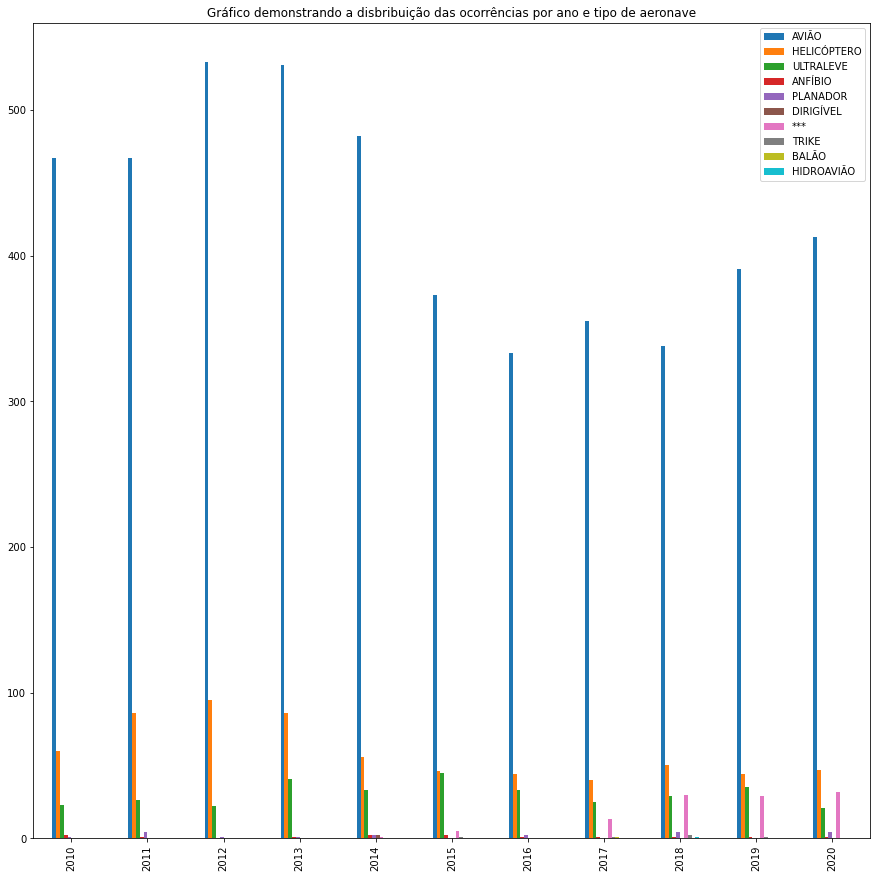

In [12]:
temp_aero_ano = dict([[x,{}] for x in just_plot_aero_ano['aeronave_tipo_veiculo'].unique()])

for x in temp_aero_ano:
    temp_aero_ano[x] = dict([[x,0] for x in just_plot_aero_ano['ocorrencia_ano'].unique()])

for x in just_plot_aero_ano.to_numpy():
    temp_aero_ano[x[1]][x[0]] += 1


pd.DataFrame(temp_aero_ano).plot.bar(figsize = (15,15), title='Gráfico demonstrando a disbribuição das ocorrências por ano e tipo de aeronave')

É Possível notar que existe discrepância entre as aeronaves do tipo Avião, dos demais tipos no número de ocorrência

<AxesSubplot:title={'center':'Gráfico demostrando a disbribuição das ocorrências com fatalidade por ano e tipo de aeronave'}>

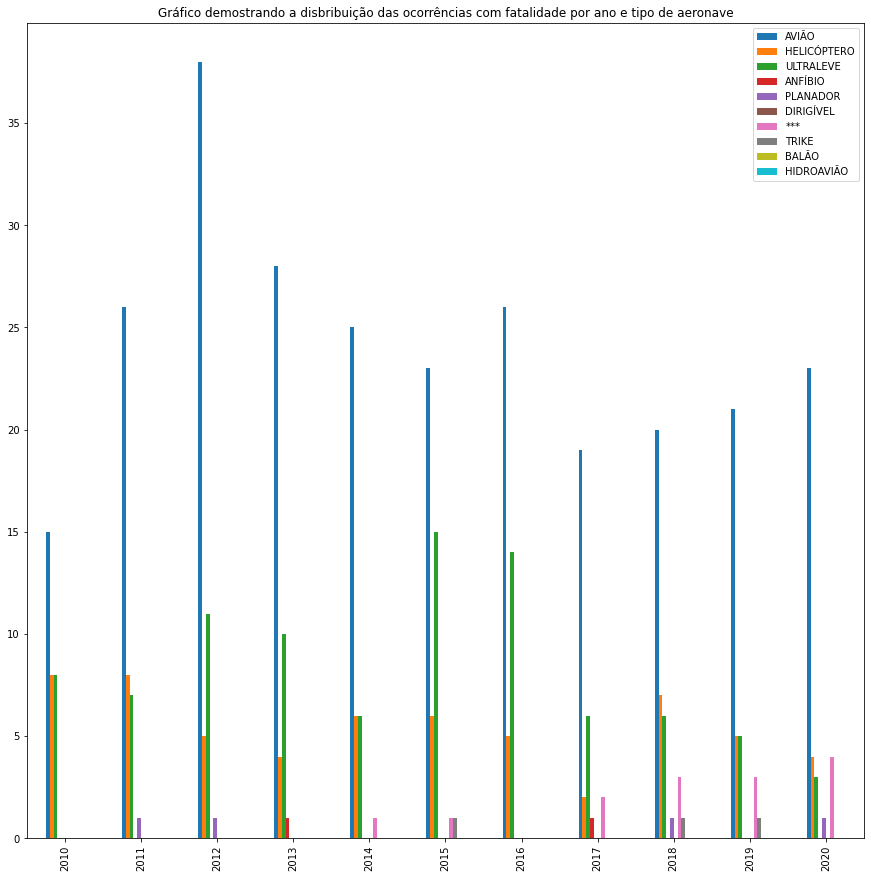

In [13]:
temp_aero_ano_fatalidade = dict([[x,{}] for x in just_plot_aero_ano['aeronave_tipo_veiculo'].unique()])

for x in temp_aero_ano_fatalidade:
    temp_aero_ano_fatalidade[x] = dict([[x,0] for x in just_plot_aero_ano['ocorrencia_ano'].unique()])

for x in just_plot_aero_ano.to_numpy():
    if x[2] > 0:
        temp_aero_ano_fatalidade[x[1]][x[0]] += 1

pd.DataFrame(temp_aero_ano_fatalidade).plot.bar(figsize = (15,15), title='Gráfico demostrando a disbribuição das ocorrências com fatalidade por ano e tipo de aeronave')

Nesse Gráfico tambem é possível notar que o Avião continua sendo o principal tipo de aeronave envolvida em ocorrências (nesse caso com fatalidade), porém é  possível observar um cresimento de topo de aeronave ultraleve

Aeronaves mais antigas tem um maior acidentes fatalidade?


,quant,porc
0.0,25,39.68%
2008.0,20,31.75%
2007.0,18,28.57%
1977.0,16,25.4%
2010.0,15,23.81%
...,...,...
1969.0,1,1.59%
2017.0,1,1.59%
2019.0,1,1.59%
1965.0,1,1.59%


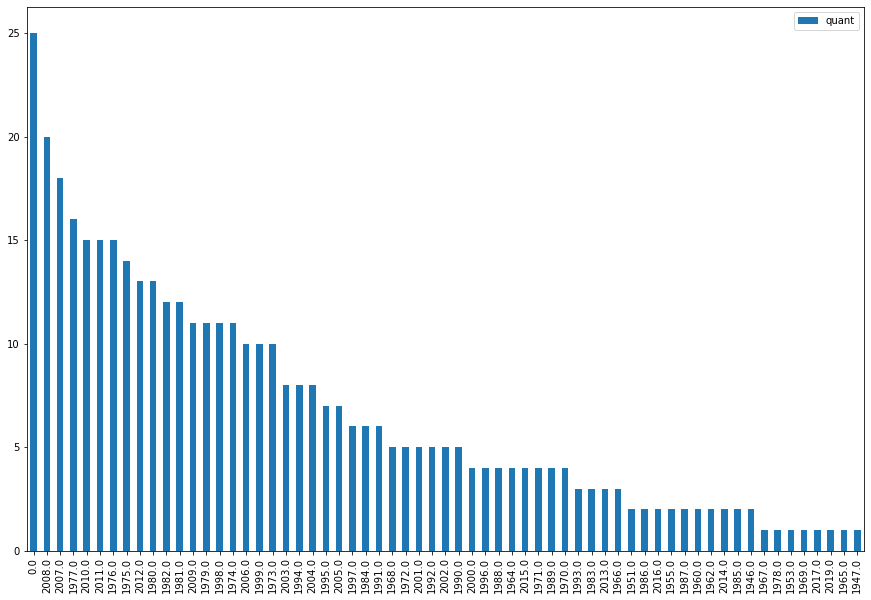

In [14]:
print('Aeronaves mais antigas tem um maior acidentes fatalidade?')

ano_frabricação_fatalidade = db_aeronave['aeronave_ano_fabricacao'][db_aeronave['aeronave_fatalidades_total']>0].value_counts()
just_plot_ano_frabricação_fatalidade = pd.DataFrame({'quant': list(ano_frabricação_fatalidade), 'porc':[str(round((x*100)/ano_frabricação_fatalidade.shape[0],2))+'%' for x in list(ano_frabricação_fatalidade)]}, index=ano_frabricação_fatalidade.index)
just_plot_ano_frabricação_fatalidade.plot.bar(figsize=(15,10))
just_plot_ano_frabricação_fatalidade

Acontece mais acidentes durante o dia


,quant
fatalidade_noite,192
fatalidade_dia,246


<AxesSubplot:ylabel='quant'>

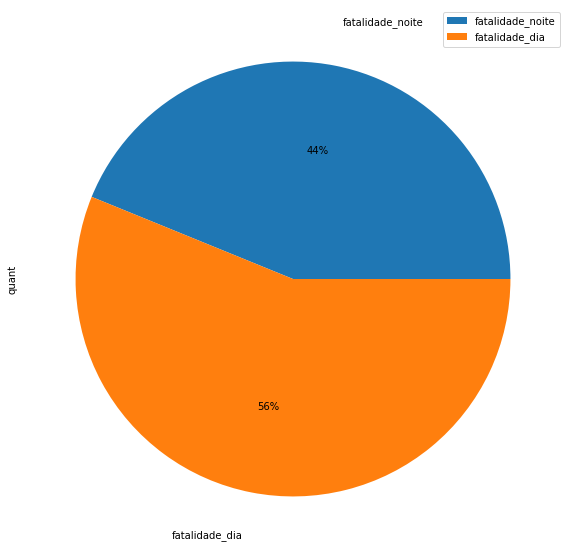

In [15]:
aux_fatalidade = db_aeronave[db_aeronave['aeronave_fatalidades_total']>0].to_numpy()
aux_horas = db_ocorrencia[['codigo_ocorrencia','ocorrencia_hora']].to_numpy()


fatalidade_por_hora = []

for i in aux_fatalidade:
    for j in aux_horas:
        if i[0] == j[0]:
            fatalidade_por_hora.append(j[1])
            break

aux_plot = pd.DataFrame(fatalidade_por_hora).value_counts()
fatalidade_noite = 0
fatalidade_dia = 0

for e,i in enumerate(aux_plot):
    if (aux_plot.index[e][0] <= 6 or aux_plot.index[e][0] >= 18):
        fatalidade_noite += i
    else: 
        fatalidade_dia += i
print("Acontece mais acidentes durante o dia")
plot_horario_fatalidade = pd.DataFrame({'quant':[ fatalidade_noite, fatalidade_dia]},index=['fatalidade_noite','fatalidade_dia'])
display(plot_horario_fatalidade)
plot_horario_fatalidade.plot.pie(y='quant',figsize=(10,10),autopct='%1.0f%%', labeldistance=1.2)

<AxesSubplot:title={'center':'Quantidade de ocorrencias segmentodo por mes'}, ylabel='quantidade'>

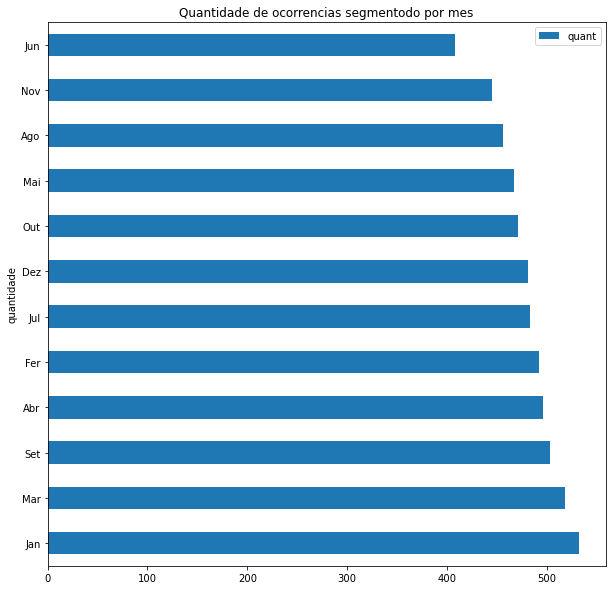

In [16]:
aux_ocorrencia_mes = db_ocorrencia['ocorrencia_mes'].value_counts()
nome_mes = ['_', 'Jan', 'Fer', 'Mar', 'Abr', 'Mai', 'Jun', "Jul", 'Ago', 'Set', 'Out', 'Nov', "Dez"]
index = [nome_mes[int(x)] for x in aux_ocorrencia_mes.index]

aux_ocorrencia_mes = pd.DataFrame({'quant': aux_ocorrencia_mes})
aux_ocorrencia_mes.index=index

aux_ocorrencia_mes.plot.barh(xlabel = 'quantidade', ylabel='Mês',figsize=(10,10), title='Quantidade de ocorrencias segmentodo por mes')


<AxesSubplot:title={'center':'Quantidade de Fatalidade segmentodo por mês'}, ylabel='quantidade'>

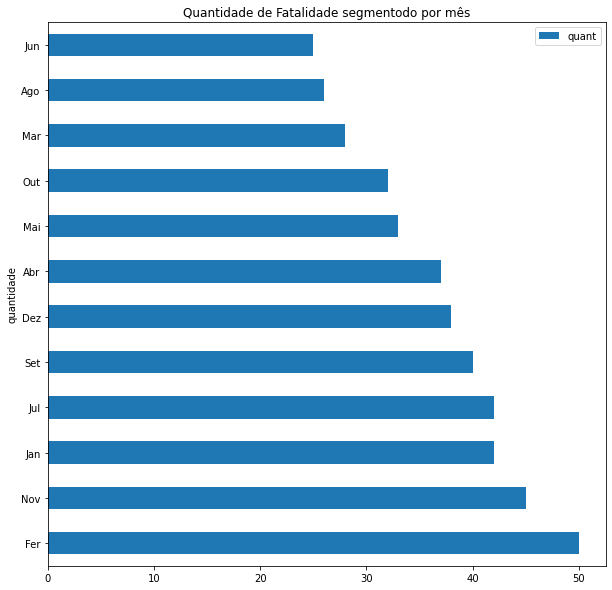

In [17]:

aux_mes = db_ocorrencia[['codigo_ocorrencia','ocorrencia_mes']].to_numpy()

fatalidade_por_mes = []

for i in aux_fatalidade:
    for j in aux_mes:
        if i[0] == j[0]:
            fatalidade_por_mes.append(j[1])
            break

aux_plot = pd.DataFrame(fatalidade_por_mes).value_counts()
index = [nome_mes[int(x[0])] for x in aux_plot.index]

aux_ocorrencia_mes = pd.DataFrame({'quant': aux_plot})
aux_ocorrencia_mes.index=index

aux_ocorrencia_mes.plot.barh(xlabel = 'quantidade', ylabel='Mês',figsize=(10,10), title='Quantidade de Fatalidade segmentodo por mês')


,quant
Indeterminado,21
EMB-201A,18
R44 II,14
EMB-202,12
EMB-202A,9
206B,9
ADVENTURE,9
PA-25-235,8
210N,7
RV-10,7


<AxesSubplot:ylabel='quant'>

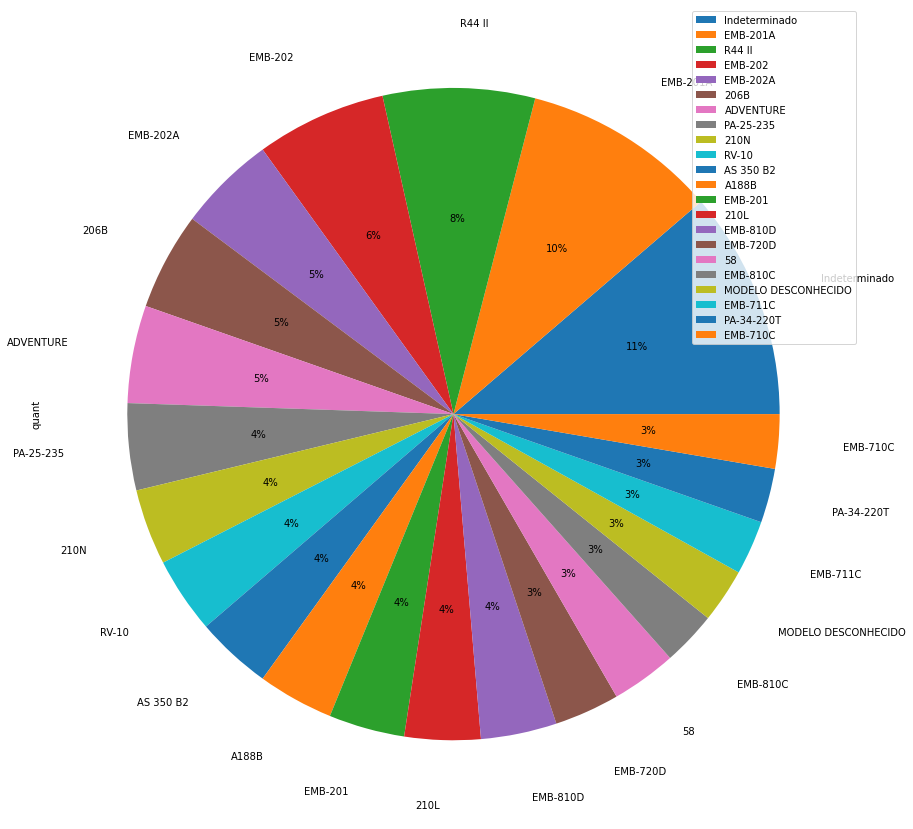

In [18]:
aux_fatalidade_modelo = db_aeronave[db_aeronave['aeronave_fatalidades_total']>0]
aux_fatalidade_modelo = aux_fatalidade_modelo['aeronave_modelo'].value_counts()
temp = []
index = []
for e,x in enumerate(aux_fatalidade_modelo):
    if x<5:
        continue
    index.append(aux_fatalidade_modelo.index[e] if aux_fatalidade_modelo.index[e]!= '***' else 'Indeterminado')
    temp.append([x])


plot_fatalidade_modelo = pd.DataFrame(temp, columns=['quant'],index=index)
display(plot_fatalidade_modelo)
plot_fatalidade_modelo.plot.pie(y='quant',x='aeronave_modelo',figsize=(15,15),autopct='%1.0f%%', labeldistance=1.2)

In [19]:
db_aeronave

,codigo_ocorrencia,aeronave_registro_segmento,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fase_operacao,aeronave_fatalidades_total
0,39115,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,SUBSTANCIAL,DECOLAGEM,0
1,39155,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,NENHUM,DECOLAGEM,0
2,39156,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,LEVE,ARREMETIDA NO AR,0
3,39158,REGULAR,AVIÃO,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,NENHUM,SUBIDA,0
4,39176,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,NENHUM,SUBIDA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,REGULAR,AVIÃO,BOEING COMPANY,737-8EH,JATO,BIMOTOR,193.0,2010.0,NENHUM,SUBIDA,0
5817,79804,REGULAR,***,BOEING COMPANY,737-48E,JATO,BIMOTOR,NaN,NaN,NENHUM,DESCIDA,0
5818,79824,AGRÍCOLA,AVIÃO,PIPER AIRCRAFT,PA-25-235,PISTÃO,MONOMOTOR,1.0,0.0,SUBSTANCIAL,MANOBRA,0
5819,79844,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,TURBOEIXO,BIMOTOR,NaN,NaN,NENHUM,CRUZEIRO,0


,quant
Indeterminado,76
NEIVA INDUSTRIA AERONAUTICA,70
CESSNA AIRCRAFT,63
PIPER AIRCRAFT,29
BEECH AIRCRAFT,25
ROBINSON HELICOPTER,24
EMBRAER,21
BELL HELICOPTER,13
HELIBRAS,11
HAWKER BEECHCRAFT,8


<AxesSubplot:ylabel='quant'>

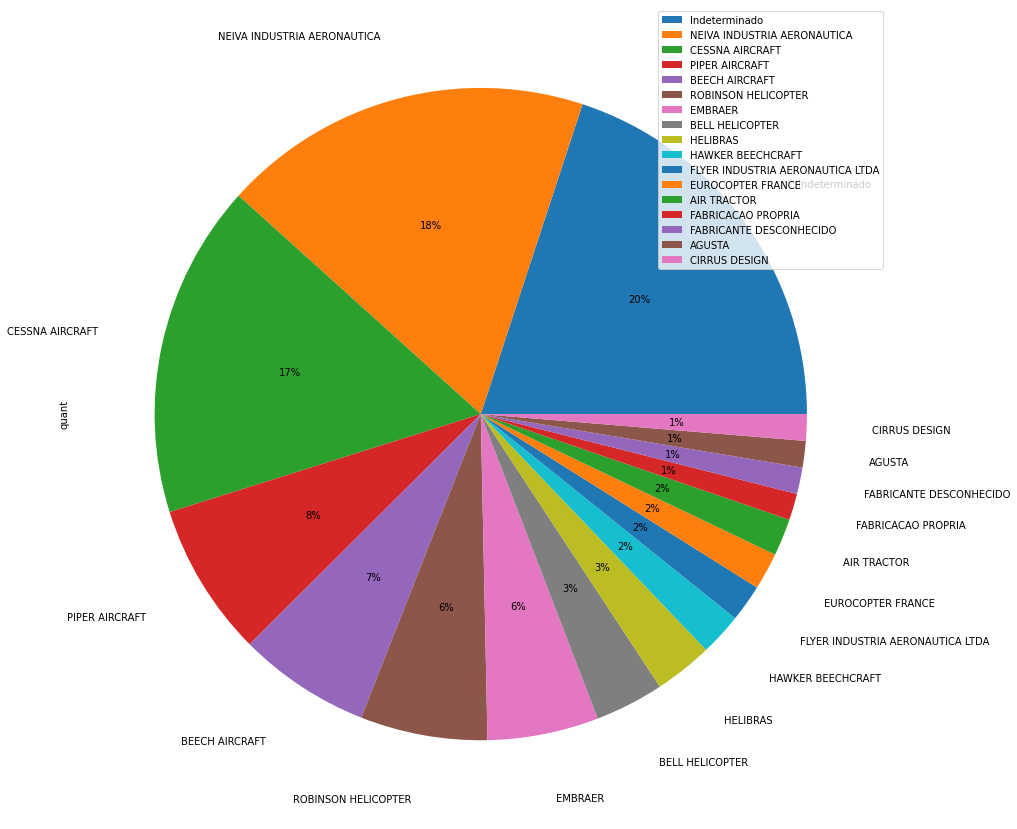

In [20]:
aux_fatalidade_fabricante = db_aeronave[db_aeronave['aeronave_fatalidades_total']>0]
aux_fatalidade_fabricante = aux_fatalidade_fabricante['aeronave_fabricante'].value_counts()
temp = []
index = []
for e,x in enumerate(aux_fatalidade_fabricante):
    if x<5:
        continue
    index.append(aux_fatalidade_fabricante.index[e] if aux_fatalidade_fabricante.index[e]!= '***' else 'Indeterminado')
    temp.append([x])


plot_fatalidade_modelo = pd.DataFrame(temp, columns=['quant'],index=index)
display(plot_fatalidade_modelo)
plot_fatalidade_modelo.plot.pie(y='quant',x='aeronave_modelo',figsize=(15,15),autopct='%1.0f%%', labeldistance=1.2)

,fator_area
"(FATOR HUMANO,)",578
"(FATOR OPERACIONAL,)",558
"(OUTRO,)",12
"(***,)",9
"(FATOR MATERIAL,)",8


<AxesSubplot:ylabel='fator_area'>

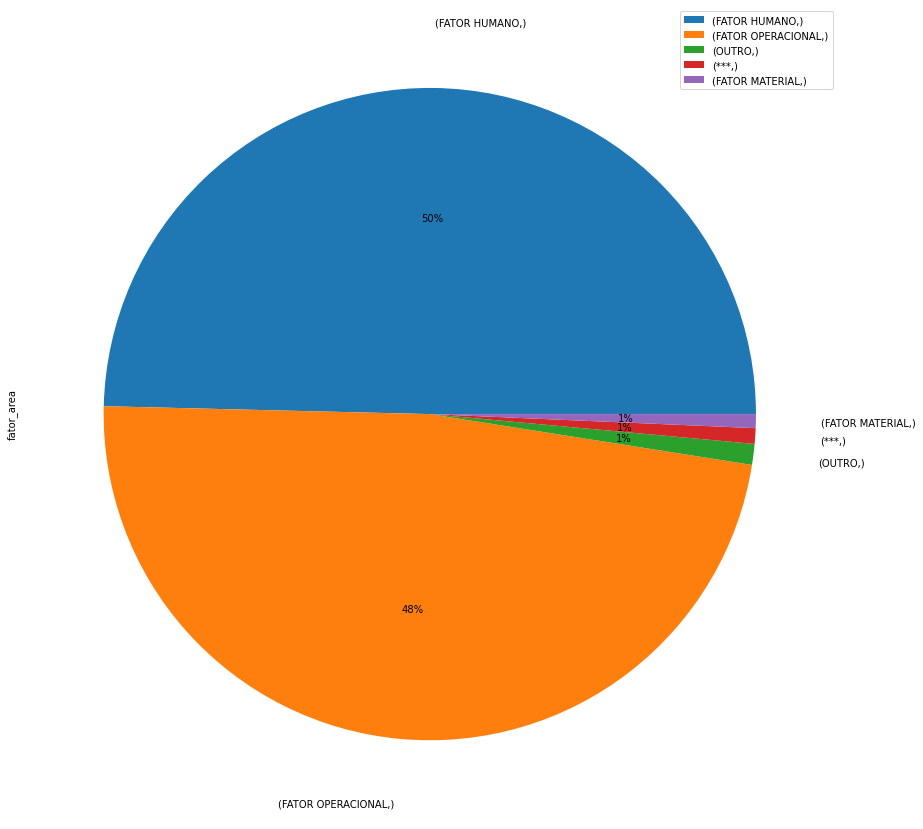

In [21]:
aux_fatalidade_fator_contribuinte = db_aeronave[db_aeronave['aeronave_fatalidades_total']>0]
aux_fatalidade_fator_contribuinte = aux_fatalidade_fator_contribuinte['codigo_ocorrencia'].to_numpy()

plot_fatalidade_fator_contribuinte = []
for i in db_fator_contribuinte.to_numpy():
    if i[0] in aux_fatalidade_fator_contribuinte:
        plot_fatalidade_fator_contribuinte.append(i[1])

plot_fatalidade_fator_contribuinte = pd.DataFrame(plot_fatalidade_fator_contribuinte, columns=['fator_area'])
display(pd.DataFrame(plot_fatalidade_fator_contribuinte.value_counts(), index=list(plot_fatalidade_fator_contribuinte.value_counts().index), columns=['fator_area']))
pd.DataFrame(plot_fatalidade_fator_contribuinte.value_counts(), index=list(plot_fatalidade_fator_contribuinte.value_counts().index), columns=['fator_area']).plot.pie(y='fator_area',x='aeronave_modelo',figsize=(15,15),autopct='%1.0f%%', labeldistance=1.2)

O Gráfico acima mostra que metade das ocorrências com fatalidade é diretamente relacionada com Fator Humano. É importante ressaltar que em FATOR OPERACIONAL também estão descritos fatores ocasionados pelo ser humano.

### 4.2 Execução dos modelos de Aprendizado de Máquina (ML)

Essa seção será responsaável por uma construção da base de dados única capaz de ser processado por um modedo (ML) e da consturção dos modelos. A base única será montada apartir da base AERONAVES, pois tem mais registro que as demais. Jà a base FATOR_CONTRIBUINTE não participará do aprendizado, pois é a menor base em questão de registro o que causaria um grande número de colunas e linhas com valores ausentes.

In [22]:
variavel_alvo = db_aeronave[['codigo_ocorrencia', 'aeronave_fatalidades_total']]
nova_base = db_aeronave
nova_base = nova_base.iloc[:,:-1].to_numpy()
temp = []
for i in nova_base:
    for j in db_ocorrencia.to_numpy():
        if i[0]==j[0]:
            aux = [x for x in i]
            aux.extend([w for e,w in enumerate(j) if e>0])
            temp.append(aux)
            break
nova_base = []

for i in temp:
    for j in db_ocorrencia_tipo.to_numpy():
        if i[0]==j[0]:
            aux = [x for x in i]
            aux.extend([w for e,w in enumerate(j) if e>0])
            nova_base.append(aux)
            break

temp = []
for i in nova_base:
    for j in variavel_alvo.to_numpy():
        if i[0]==j[0]:
            aux = [x for x in i]
            aux.extend([w if w==0 else 1 for e,w in enumerate(j) if e>0])
            temp.append(aux)
            break

nova_base = temp


In [23]:
colunas = ['codigo_ocorrencia','aeronave_registro_segmento', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_assentos', 'aeronave_ano_fabricacao', 'aeronave_nivel_dano', 'aeronave_fase_operacao','ocorrencia_classificacao','ocorrencia_uf','total_aeronaves_envolvidas', 'ocorrencia_hora', 'ocorrencia_hora',  'ocorrencia_ano',  'ocorrencia_tipo', 'aeronave_fatalidades_total']
nova_base = pd.DataFrame(nova_base,columns=colunas)
nova_base

,codigo_ocorrencia,aeronave_registro_segmento,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fase_operacao,ocorrencia_classificacao,ocorrencia_uf,total_aeronaves_envolvidas,ocorrencia_hora,ocorrencia_hora,ocorrencia_ano,ocorrencia_tipo,aeronave_fatalidades_total
0,39115,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,SUBSTANCIAL,DECOLAGEM,ACIDENTE,BA,1,17.0,2,2010,PANE SECA,0
1,39155,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,NENHUM,DECOLAGEM,INCIDENTE,MG,1,12.0,2,2010,VAZAMENTO DE COMBUSTÍVEL,0
2,39156,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,LEVE,ARREMETIDA NO AR,INCIDENTE GRAVE,PR,1,23.0,1,2010,FOGO EM VOO,0
3,39158,REGULAR,AVIÃO,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,NENHUM,SUBIDA,INCIDENTE,PA,1,16.0,1,2010,SUPERAQUECIMENTO,0
4,39176,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,NENHUM,SUBIDA,INCIDENTE,MA,1,9.0,2,2010,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,REGULAR,AVIÃO,BOEING COMPANY,737-8EH,JATO,BIMOTOR,193.0,2010.0,NENHUM,SUBIDA,INCIDENTE,RJ,1,0.0,12,2020,VAZAMENTO DE OUTROS FLUIDOS,0
5817,79804,REGULAR,***,BOEING COMPANY,737-48E,JATO,BIMOTOR,NaN,NaN,NENHUM,DESCIDA,INCIDENTE,SP,1,19.0,12,2020,DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA,0
5818,79824,AGRÍCOLA,AVIÃO,PIPER AIRCRAFT,PA-25-235,PISTÃO,MONOMOTOR,1.0,0.0,SUBSTANCIAL,MANOBRA,ACIDENTE,MG,1,17.0,12,2020,PERDA DE CONTROLE EM VOO,0
5819,79844,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,TURBOEIXO,BIMOTOR,NaN,NaN,NENHUM,CRUZEIRO,INCIDENTE,RJ,1,13.0,12,2020,FALHA DO MOTOR EM VOO,0


## 5. Conclusões e Insights Gerados

Pelo fato do email contendo o desafio ter ido parar na caixa de spam, esse estudo foi executado em 1 dia. Por esse motivo a implementação dos algoritmos de aprendizado de máquina teve que ser interrompido.

Dadas as possibilidades de abordagem diferentes, presentes nessas base de dados, o caminho escolhido foi a avaliação e levantamento de hipóteses perante as ocorrências com fatalidade. As perguntas iniciais descritas na seção 3 foram respondidas:

1. Aeronaves mais antigas têm um maior número de acidentes com fatalidade?
* Não necessariamente, dentre as 5 datas com identificação, 4 tem menos de 20 anos.
2. Ocorrências com fatalidade têm predominância no período noturno?
* Pelo contrario, a análise mostrou que cerca de mais da metade das ocorrência com fatalidade aconteceram de dia.
3. Quais meses tem maior número de Ocorrência?
* Janeiro, Março e Setembro.
4. Quais meses tem maior número de Ocorrência com fatalidade?
* Fevereiro, novembro e janeiro
5. Alguma modelo está mais associado a Ocorrência com fatalidade?
* Os modelos com maior porcentagem são EMB_201A, R44 II, e EMB-202. Porém, não traz nenhuma grande distância entre os demais,  ainda que não exista essa associação entre modelos e Ocorrência com fatalidade.
6. Algum Fabricante está mais associado a Ocorrência com fatalidade?
* As fabricantes NEIVA INDUSTRIA AERONAUTICA e CESSNA AIRCRAFT apresentam elevado número de ocorrência comparada aos demais, indicando uma possível característica negativa perante as demais.
7. O maior número de ocorrência com fatalidade está entre quais tipos aeronaves?
* Nas aeronaves do modelo Avião, tendo em número elevado de Ocorrência com e sem fatalidades. Porém o que deve ser ressaltado é que ~80% das Ocorrência registradas são desse tipo de modelo.  
8. É possível apontar que a maioria das ocorrências com fatalidade estão relacionadas a fatores humanos?
* Sim, conforme apresentado acima.
9. Qual o resultado apresentado pelos algoritmos de ML?
* Não foi possível obter essa resposta, dados os imprevistos citados.

Como próximos passos, é indicado a realização dos testes dos modelos de aprendizado de máquina, e com os resultados decidir qual melhor caminho a se realizar. Outro ponto a ser reanalisado são algumas variáveis que foram, deixadas de fora da análise devido ao prazo inicial. E quando possível também executar testes estatísticos mais aprofundados.

